# Import and Download libraries

In [1]:
# !pip install stopwordsiso
# !pip install fuzzywuzzy[speedup]
# !pip install spacy
!pip install swifter
!pip install Sastrawi
!pip install nlp-id

In [2]:
import pandas as pd
import nltk
import ast
import os

# from fuzzywuzzy import fuzz

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Loading Files

1. merge files into one dataframe
2. export dataframe into csv

In [ ]:
data_dir='/content/drive/MyDrive/Gemastik21/cleaned-data'
files = os.listdir(data_dir)

In [ ]:
# sample dataframe from one file
jan = pd.read_csv(data_dir+'/'+files[0])
jan.head()

,Unnamed: 0,Username,PostDate,TweetText,TweetURL,clean_text
0,0,@rsqrjo,2021-01-02,"udahh hold kerass aja, si anjing disayang jang...",https://twitter.com/rsqrjo/status/134515281866...,['udahh hold kerass aja si anjing sayang dijua...
1,1,@Ilhamhamdi13,2021-01-02,( 2021 )mengajak para generasi milenial khusus...,https://twitter.com/Ilhamhamdi13/status/134515...,[' dua ribu dua puluh satu ajak generasi milen...
2,2,@mncsforever,2021-01-02,RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...,https://twitter.com/mncsforever/status/1345155...,['rt mncsekuritas mnc sekuritas tingkat forma ...
3,3,@warmwhitee,2021-01-02,Kita2 yang karyawan enaknya swing trading aja ...,https://twitter.com/warmwhitee/status/13451540...,['kitadua karyawan enak swing trading aja ya ']
4,4,@SonGoldFX,2021-01-02,SonGoldFX adalah jasa konsultasi forex trading...,https://twitter.com/SonGoldFX/status/134514294...,"['songoldfx jasa konsultasi forex trading ', '..."


In [ ]:
del jan

In [ ]:
df = pd.DataFrame()

for file in files:
  sub_df = pd.read_csv(data_dir + '/' + file, index_col=0)
  df = pd.concat([df, sub_df], ignore_index=True)

In [ ]:
df

,Username,PostDate,TweetText,TweetURL,clean_text
0,@rsqrjo,2021-01-02,"udahh hold kerass aja, si anjing disayang jang...",https://twitter.com/rsqrjo/status/134515281866...,['udahh hold kerass aja si anjing sayang dijua...
1,@Ilhamhamdi13,2021-01-02,( 2021 )mengajak para generasi milenial khusus...,https://twitter.com/Ilhamhamdi13/status/134515...,[' dua ribu dua puluh satu ajak generasi milen...
2,@mncsforever,2021-01-02,RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...,https://twitter.com/mncsforever/status/1345155...,['rt mncsekuritas mnc sekuritas tingkat forma ...
3,@warmwhitee,2021-01-02,Kita2 yang karyawan enaknya swing trading aja ...,https://twitter.com/warmwhitee/status/13451540...,['kitadua karyawan enak swing trading aja ya ']
4,@SonGoldFX,2021-01-02,SonGoldFX adalah jasa konsultasi forex trading...,https://twitter.com/SonGoldFX/status/134514294...,"['songoldfx jasa konsultasi forex trading ', '..."
...,...,...,...,...,...
207689,@ZamanX90,2021-05-31,Sp 4 yr ekak nam top tier e gana gewanawa SE l...,https://twitter.com/ZamanX90/status/1399075592...,['sp empat yr ekak nam top tier e gana gewanaw...
207690,@cryptoalert_id,2021-05-31,BTC naik 5% sejak 24H yang lalu Rp503.288.000...,https://twitter.com/cryptoalert_id/status/1399...,['btc lima dua puluh empath rplima03 dua ratus...
207691,@LikeJoseph17,2021-05-31,Karena pemain baru apalagi yg bru kenal dunia ...,https://twitter.com/LikeJoseph17/status/139907...,[' main yang bru kenal dunia crypto otak tuh c...
207692,@KramatDjati3,2021-05-31,andBismillah,https://twitter.com/KramatDjati3/status/139906...,['andbismillah']


In [ ]:
# save merged data into csv file
df.to_csv(data_dir+'/full.csv')

Load the full completed file into dataframe

In [ ]:
data = '/content/drive/MyDrive/Gemastik21/cleaned-data/full.csv'
df = pd.read_csv(data, index_col=0)

In [ ]:
df.head()

,Username,PostDate,TweetText,TweetURL,clean_text
0,@rsqrjo,2021-01-02,"udahh hold kerass aja, si anjing disayang jang...",https://twitter.com/rsqrjo/status/134515281866...,['udahh hold kerass aja si anjing sayang dijua...
1,@Ilhamhamdi13,2021-01-02,( 2021 )mengajak para generasi milenial khusus...,https://twitter.com/Ilhamhamdi13/status/134515...,[' dua ribu dua puluh satu ajak generasi milen...
2,@mncsforever,2021-01-02,RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...,https://twitter.com/mncsforever/status/1345155...,['rt mncsekuritas mnc sekuritas tingkat forma ...
3,@warmwhitee,2021-01-02,Kita2 yang karyawan enaknya swing trading aja ...,https://twitter.com/warmwhitee/status/13451540...,['kitadua karyawan enak swing trading aja ya ']
4,@SonGoldFX,2021-01-02,SonGoldFX adalah jasa konsultasi forex trading...,https://twitter.com/SonGoldFX/status/134514294...,"['songoldfx jasa konsultasi forex trading ', '..."


In [ ]:
df.describe()

,Username,PostDate,TweetText,TweetURL,clean_text
count,207694,207694,207694,207694,207694
unique,38056,147,67544,72588,65595
top,@tarrrroo_crypto,2021-05-18,Latoken adalah rumah yang tepat bagi investasi...,https://twitter.com/martabakmanys/status/13946...,"['latoken rumah investasi aset ', 'gabung sist..."
freq,4871,5494,1029,3,1077


In [ ]:
# filter data from duplicated rows baseed on Tweet URL
df = df[~df.duplicated(subset=['TweetURL'])]

In [ ]:
df

In [ ]:
# save filtered data to csv
df.to_csv('/content/drive/MyDrive/Gemastik21/filtered.csv', index=False)

# Preprocessing for 2nd Time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nlp_id.lemmatizer import Lemmatizer
import swifter

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as stemmer_factory
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import spacy

In [64]:
extra_stopwords = ['ayo', 'dan', 'yg', 'ini', 'dengan', 'to','ya', 'yes', 'sih'
                    'itu', 'dari', 'ada', 'dalam', 'is', 'di',
                    'ga', 'ya', 'ke', 'el', 'the', 'jg',
                    'bgtu','sdh','org','krn','msh','utk',
                    'dgn','ni','sm','udh','bnyk','jgn',
                    'dll','jd','tp','pd','tdk','ambe',
                    'guys','gini','for','bgt','ah',
                    'nggak','biar','deh','nih','klo',
                    'yg','gak','nya','kl','bikin','bhw',
                    'ya','aja','ga','ha','si','from',
                    'the','at','yak','have','to','ini',
                    'itu','dari','dan','ada','dalam',
                    'is','ke','el','eh','yuk','kuy',
                    'blm','kan','klo','tetap','pada',
                    'pda','kalo','sama','yang','tapi',
                    'kok','lagi','di','juga','mau',
                    'of','dah','yah','tuh','emang','pas',
                    'lg','emg','karna','be','ngga','nah',
                    'RT', 'replying', 'to', 'adanya', 'adapun', 'agak', 'agaknya',
                    'agar', 'akulah', 'amat', 'amatlah', 'andalah', 'antar', 'antara', 'antaranya',
                    'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'bagai', 'bagaikan',
                    'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'bakal', 'bakalan', 'balik',
                    'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah',
                    'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang',
                    'belakangan', 'berada', 'berapalah', 'berbagai', 'berikut', 'berikutnya',
                    'berkenaan', 'berlainan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula'
                    'bersama', 'bersama-sama', 'berturut', 'berturut-turut', 'berupa', 'besar', 'betul',
                    'biasa', 'biasanya', 'bila', 'buat', 'bukannya', 'bulan', 'bung', 'cuma',
                    'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 
                    'demikian', 'dengan', 'depan', 'dia', 'dialah', 'diantara', 'diantaranya', 'dibuat',
                    'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya',
                    'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud',
                    'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'dimisalkan', 'diperbuat',
                    'diperbuatnya', 'dipergunakan', 'dipersoalkan', 'dipunyai', 'diri', 'dirinya', 
                    'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditunjuk', 
                    'ditunjuki', 'dong', 'dulu', 'guna', 'gunakan', 'hal', 'hanya', 'hanyalah', 
                    'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ini', 
                    'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 
                    'jauh', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 
                    'kan', 'karenanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 
                    'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 
                    'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kepada', 'kepadanya', 
                    'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'klo', 'kok', 
                    'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lanjut', 'lanjutnya', 
                    'lebih', 'lewat', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 
                    'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 
                    'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 
                    'mau', 'maupun', 'melainkan', 'melalui', 'melihat', 'melihatnya', 'memang', 
                    'membuat', 'memerlukan', 'memintakan', 'memisalkan', 'memperbuat', 
                    'mempergunakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 
                    'menambahkan', 'menanti', 'menanti-nanti', 'menantikan', 'mendatang', 
                    'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 
                    'mengibaratkan', 'mengibaratkannya', 'menginginkan', 'mengira', 'menjadi', 
                    'menuju', 'menunjuk', 'menunjuki', 'menunjukan', 'menunjuknya', 'menyeluruh', 
                    'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 
                    'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mungkin', 'mungkinkah', 'nah', 
                    'naik', 'namun', 'nanti', 'nantinya', 'nyatanya', 'oleh', 'olehnya', 'pada', 
                    'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 
                    'pastilah', 'penting', 'pentingnya', 'per', 'pertama', 'pertama-tama', 'pihak', 
                    'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya',
                    'saja', 'sajalah', 'saling', 'sambil', 'sampai', 'sampai-sampai', 'sana', 'sangat', 
                    'sangatlah', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 
                    'sebagian', 'sebegini', 'sebegitu', 'sebelum', 'sebesar', 'sebisanya', 'sebuah', 'sebut', 
                    'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 
                    'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'sehingga', 'sejak',
                    'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 
                    'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 
                    'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selain', 'selaku', 
                    'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 
                    'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 
                    'sementara', 'semisal', 'semisalnya', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 
                    'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 
                    'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'seru', 'serupa', 'sesaat', 
                    'sesama', 'sesampai', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 
                    'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setinggi', 
                    'seusai', 'sewaktu', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'supaya', 'tadi', 
                    'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 
                    'tandasnya', 'tanpa', 'tapi', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 
                    'tentunya', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 
                    'terhadapnya', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 
                    'terlihat', 'termasuk', 'ternyata', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 
                    'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tinggi', 'toh', 
                    'tunjuk', 'turut', 'umum', 'umumnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 
                    'waktu', 'walau', 'walaupun', 'wong', 'yah', 'yaitu', 'yakin', 'yakni', 'yang', 'ada', 
                    'adalah', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'anda', 'apa', 'apaan', 
                    'apabila', 'apakah', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagaimana', 
                    'bagaimanakah', 'bagaimanapun', 'baik', 'banyak', 'beginilah', 'belum', 'belumlah', 
                    'benar', 'benarkah', 'benarlah', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 
                    'berapakah', 'berapapun', 'berarti', 'berawal', 'berdatangan', 'beri', 'berikan', 
                    'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berlalu', 
                    'berlangsung', 'berlebihan', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 
                    'bertutur', 'berujar', 'betulkah', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 
                    'bolehlah', 'bukan', 'bukankah', 'bukanlah', 'cara', 'caranya', 'cukup', 'cukupkah', 
                    'cukuplah', 'demikianlah', 'di', 'diakhiri', 'diakhirinya', 'diberi', 'diberikan', 
                    'diberikannya', 'datangkan', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 
                    'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 
                    'diketahui', 'diminta', 'dimintai', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 
                    'dini', 'dipastikan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 
                    'dipertanyakan', 'disampaikan', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 
                    'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 
                    'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dua', 
                    'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'hampir', 'hari', 'harus', 'haruslah', 
                    'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'ikut', 'ingat', 'ingat-ingat', 'ingin',
                    'inginkah', 'inginkan', 'jangan', 'jangankan', 'janganlah', 'jawab', 'jawaban', 'jawabnya', 
                    'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 
                    'kami', 'kamilah', 'kamu', 'kamulah', 'kapan', 'kapankah', 'kapanpun', 'karena', 'kasus', 
                    'kata', 'katakan', 'katakanlah', 'katanya', 'kenapa', 'kesampaian', 'keseluruhan', 
                    'keseluruhannya', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kurang', 'lama', 'lamanya', 
                    'lima', 'melakukan', 'memastikan', 'memberi', 'memberikan', 'memihak', 'meminta', 
                    'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 
                    'menandaskan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 
                    'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 
                    'mengingat', 'mengingatkan', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 
                    'menjawab', 'menjelaskan', 'menunjukkan', 'menurut', 'menuturkan', 'menyampaikan',
                    'menyangkut', 'menyatakan', 'menyebutkan', 'meyakini', 'meyakinkan', 'mula', 
                    'mulai', 'mulailah', 'mulanya', 'nyaris', 'percuma', 'perlu', 'perlukah', 'perlunya', 
                    'pernah', 'persoalan', 'pertanyaan', 'pertanyakan', 'saat', 'saatnya', 'sama', 'sama-sama', 
                  'sampaikan', 'satu', 'saya', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 
                    'sebanyak', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebetulnya', 'segera', 'seharusnya', 
                    'seingat', 'sema', 'sa', 'sih', 'semaunya', 'sempat', 'seperlunya', 'sesegera', 
                    'setidak-tidaknya', 'setidaknya', 'siap', 'siapa', 'siapakah', 'siapapun', 'sudah', 
                    'sudahkah', 'sudahlah', 'ta', 'tanya', 'tanyakan', 'tanyanya', 'tegas', 'tegasnya', 
                    'tepat', 'terakhir', 'teringat', 'teringat-ingat', 'tersampaikan', 'tidak', 'tidakkah', 
                    'tidaklah', 'tiga', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 
                    'ujar', 'ujarnya', 'ungkap', 'ungkapnya', 'waktunya']

In [65]:
more_stopwords = ['belas', 'ratus', 'puluh', 'ribu', 'juta', 'satu', 'dua', 'tiga',
                  'empat','lima', 'enam', 'tujuh', 'delapan', 'sembilan', 'nol',
                  'kayak', 'tidak', 'hai', 'me', 'done', 'ki', 'moga', 'bang',
                  'amin', 'kak', 'rplima', 'rpempat', 'rptiga', 'rpdua', 'rpsatu',
                  'rpenam', 'rptujuh', 'rpdelapan', 'rpsembilan', 'and', 'je', 
                  'nak', 'you', 'thank you']

In [7]:
def createSlangDict(slang_file_dir):
    slang_df = pd.read_csv(slang_file_dir, header=0)
    return dict(slang_df.values)

def addSastrawiStopword(stopword_list:list):
    """
    add more stopwords for indonesian stopwords.
    """
    stop_factory = StopWordRemoverFactory().get_stop_words()
    stopword_list = stop_factory + stopword_list
    stop_dict = ArrayDictionary(stopword_list)
    sastrawi_stopwords = StopWordRemover(stop_dict)
    return sastrawi_stopwords
  
def textConvertion(text:str):
    """
    convert string containing list into list then join the text
    """
    text = ast.literal_eval(text)
    text = ' '.join(text)
    # remove extra spaces
    text = " ".join(text.split())
    return text

def normalizeWord(slang_dict, text:str):
    words = text.split()
    for i, word in enumerate(words):
      if word in slang_dict.keys():
        words[i] = slang_dict[word]
    return ' '.join(words)

nlp_lemma = Lemmatizer()
def lemmatizing(text:str):
    """
    get the root words from every word in a sentence.
    """
    return nlp_lemma.lemmatize(text)

def sastrawiStopWordRemoval(sastrawi_stopwords, text:str):
    """
    remove stopwords using sastrawi's stopwords.
    """
    return sastrawi_stopwords.remove(text)

def nltkStopWordRemoval(stopwords_list, text:str):
    """
    after stopword removal with sastrawi stopwords, do stopword removal once
    again with nltk stopwords then returns sentences without stopwords.
    """
    word_tokens = word_tokenize(text)
    word_tokens = [token for token in word_tokens if token not in stopwords_list]
    return ' '.join(word_tokens)

# def stemming(text):
#     stemmer = stemmer_factory.create_stemmer()
#     return stemmer.stem(text)
  
# def setNLTKStopword(lang:str):
#     """
#     set stopwords language. i.e: 'indonesian'.
#     """
#     nltk_stopwords = set(stopwords.words(lang))
#     return nltk_stopwords
  
# def startNow(self, text, slang_dict, sastrawi_stopwords, nltk_stopwords):
#     text = self.spaceRemoval(text)
#     text = self.normalizeWord(slang_dict, text)
#     text = self.lemmatizing(text)
#     text = self.stemming(text)
#     text = self.sastrawiStopWordRemoval(sastrawi_stopwords, text)
#     text = self.nltkStopWordRemoval(nltk_stopwords, text)
#     text = self.tokenize(text)
#     return text

In [66]:
df = pd.read_csv('/content/drive/MyDrive/Gemastik21/filtered.csv')

In [67]:
slang_dict = createSlangDict('/content/drive/MyDrive/Gemastik21/slang-words.csv')
slang_dict['tau'] = 'tahu'
sastrawi_stopwords = addSastrawiStopword(extra_stopwords)

idn_stopwords = list(stopwords.words('indonesian'))
extra_stopwords = extra_stopwords + more_stopwords
idn_stopwords = idn_stopwords + extra_stopwords
# nltk_stopwords = setNLTKStopword('indonesian')

In [68]:
cleaned_text = []
for texts in df['clean_text']:
  try:
    texts = textConvertion(texts)
    texts = normalizeWord(slang_dict, texts)
    texts = lemmatizing(texts)
    texts = sastrawiStopWordRemoval(sastrawi_stopwords, texts)
    texts = nltkStopWordRemoval(idn_stopwords, texts)
    cleaned_text.append(texts)

  except ValueError:
    texts = 0
    cleaned_text.append(texts)
    print('skip. no data is found in row number {}'.format(len(cleaned_text)))
    continue

%timeit

skip. no data is found in row number 31421
skip. no data is found in row number 32508
skip. no data is found in row number 37562
skip. no data is found in row number 43465
skip. no data is found in row number 71887


In [69]:
df['cleaned_text'] = cleaned_text

In [70]:
df

,Username,PostDate,TweetText,TweetURL,clean_text,cleaned_text
0,@rsqrjo,2021-01-02,"udahh hold kerass aja, si anjing disayang jang...",https://twitter.com/rsqrjo/status/134515281866...,['udahh hold kerass aja si anjing sayang dijua...,hold keras anjing sayang dijualin
1,@Ilhamhamdi13,2021-01-02,( 2021 )mengajak para generasi milenial khusus...,https://twitter.com/Ilhamhamdi13/status/134515...,[' dua ribu dua puluh satu ajak generasi milen...,ajak generasi milenial khusus indonesia tradin...
2,@mncsforever,2021-01-02,RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...,https://twitter.com/mncsforever/status/1345155...,['rt mncsekuritas mnc sekuritas tingkat forma ...,rt mncsekuritas mnc sekuritas tingkat forma pl...
3,@warmwhitee,2021-01-02,Kita2 yang karyawan enaknya swing trading aja ...,https://twitter.com/warmwhitee/status/13451540...,['kitadua karyawan enak swing trading aja ya '],kitadua karyawan enak swing trading
4,@SonGoldFX,2021-01-02,SonGoldFX adalah jasa konsultasi forex trading...,https://twitter.com/SonGoldFX/status/134514294...,"['songoldfx jasa konsultasi forex trading ', '...",songoldfx jasa konsultasi forex trading produk...
...,...,...,...,...,...,...
72583,@ENurhelis,2021-05-31,andBismillah,https://twitter.com/ENurhelis/status/139908157...,['andbismillah'],andbismillah
72584,@pjsgfriend,2021-05-31,Kalo mau nawarin gedor dm sj,https://twitter.com/pjsgfriend/status/13990873...,['kalo nawarin gedor dm sj'],tawar gedor dm
72585,@umarmuhdhamman,2021-05-31,Karya ne,https://twitter.com/umarmuhdhamman/status/1399...,['karya ne'],karya
72586,@HBishop1,2021-05-31,andAzerbaijan,https://twitter.com/HBishop1/status/1399078658...,['andazerbaijan'],andazerbaijan


In [11]:
df.to_csv('/content/drive/MyDrive/Gemastik21/cleaned.csv', index=False)

#Topic Modelling

after completed the preprocessing for the dataset. the next move is creating topic for each tweet. 

In [85]:
df = pd.read_csv('/content/drive/MyDrive/Gemastik21/cleaned.csv')
df.head()

,Username,PostDate,TweetText,TweetURL,clean_text,cleaned_text
0,@rsqrjo,2021-01-02,"udahh hold kerass aja, si anjing disayang jang...",https://twitter.com/rsqrjo/status/134515281866...,['udahh hold kerass aja si anjing sayang dijua...,hold keras sih anjing sayang dijualin
1,@Ilhamhamdi13,2021-01-02,( 2021 )mengajak para generasi milenial khusus...,https://twitter.com/Ilhamhamdi13/status/134515...,[' dua ribu dua puluh satu ajak generasi milen...,ribu puluh ajak generasi milenial khusus indon...
2,@mncsforever,2021-01-02,RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...,https://twitter.com/mncsforever/status/1345155...,['rt mncsekuritas mnc sekuritas tingkat forma ...,rt mncsekuritas mnc sekuritas tingkat forma pl...
3,@warmwhitee,2021-01-02,Kita2 yang karyawan enaknya swing trading aja ...,https://twitter.com/warmwhitee/status/13451540...,['kitadua karyawan enak swing trading aja ya '],kitadua karyawan enak swing trading ya
4,@SonGoldFX,2021-01-02,SonGoldFX adalah jasa konsultasi forex trading...,https://twitter.com/SonGoldFX/status/134514294...,"['songoldfx jasa konsultasi forex trading ', '...",songoldfx jasa konsultasi forex trading produk...


In [71]:
df[df['clean_text'] == 'fail']

,Username,PostDate,TweetText,TweetURL,clean_text,cleaned_text
31420,@GEMBIRA32127252,2021-03-26,#STC #ETH #DEFI #PTO #ICOMantap,https://twitter.com/GEMBIRA32127252/status/137...,fail,0
32507,@Eth_Sph,2021-03-30,:crying_kejang:,https://twitter.com/Eth_Sph/status/13769235520...,fail,0
37561,@RahulKGupta0,2021-04-13,#RahulGupta@TechRahulwala#ramadanmubarak #Rama...,https://twitter.com/RahulKGupta0/status/138185...,fail,0
43464,@JeJePSG10,2021-04-21,#giveaway#bitcoin #bnb #pancakeswap#pancakebunny,https://twitter.com/JeJePSG10/status/138479638...,fail,0
71886,@CryptoYousra127,2021-05-30,#Keanu$Keanu,https://twitter.com/CryptoYousra127/status/139...,fail,0


In [72]:
# remove rows contain 'fail'
df = df[df['clean_text'] != 'fail']

# drop rows contain nan values
df = df.dropna(axis=0)

df = df.reset_index()

In [73]:
df.describe()

,index
count,72583.000000
mean,36293.012689
std,20954.770332
min,0.000000
25%,18145.500000
50%,36293.000000
75%,54440.500000
max,72587.000000


In [74]:
df.to_csv('/content/drive/MyDrive/Gemastik21/fixed-cleaned.csv', index=False)

A. Tokenizing with Gensim

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Gemastik21/fixed-cleaned.csv')

In [36]:
df

,index,Username,PostDate,TweetText,TweetURL,clean_text,cleaned_text
0,0,@rsqrjo,2021-01-02,"udahh hold kerass aja, si anjing disayang jang...",https://twitter.com/rsqrjo/status/134515281866...,['udahh hold kerass aja si anjing sayang dijua...,hold keras anjing sayang dijualin
1,1,@Ilhamhamdi13,2021-01-02,( 2021 )mengajak para generasi milenial khusus...,https://twitter.com/Ilhamhamdi13/status/134515...,[' dua ribu dua puluh satu ajak generasi milen...,ajak generasi milenial khusus indonesia tradin...
2,2,@mncsforever,2021-01-02,RT MNCSekuritas: MNC Sekuritas Tingkatkan Pefo...,https://twitter.com/mncsforever/status/1345155...,['rt mncsekuritas mnc sekuritas tingkat forma ...,rt mncsekuritas mnc sekuritas tingkat forma pl...
3,3,@warmwhitee,2021-01-02,Kita2 yang karyawan enaknya swing trading aja ...,https://twitter.com/warmwhitee/status/13451540...,['kitadua karyawan enak swing trading aja ya '],kitadua karyawan enak swing trading
4,4,@SonGoldFX,2021-01-02,SonGoldFX adalah jasa konsultasi forex trading...,https://twitter.com/SonGoldFX/status/134514294...,"['songoldfx jasa konsultasi forex trading ', '...",songoldfx jasa konsultasi forex trading produk...
...,...,...,...,...,...,...,...
72578,72583,@ENurhelis,2021-05-31,andBismillah,https://twitter.com/ENurhelis/status/139908157...,['andbismillah'],andbismillah
72579,72584,@pjsgfriend,2021-05-31,Kalo mau nawarin gedor dm sj,https://twitter.com/pjsgfriend/status/13990873...,['kalo nawarin gedor dm sj'],tawar gedor dm
72580,72585,@umarmuhdhamman,2021-05-31,Karya ne,https://twitter.com/umarmuhdhamman/status/1399...,['karya ne'],karya
72581,72586,@HBishop1,2021-05-31,andAzerbaijan,https://twitter.com/HBishop1/status/1399078658...,['andazerbaijan'],andazerbaijan


In [44]:
df['cleaned_text'].loc[1:5]

1    ajak generasi milenial khusus indonesia tradin...
2    rt mncsekuritas mnc sekuritas tingkat forma pl...
3                  kitadua karyawan enak swing trading
4    songoldfx jasa konsultasi forex trading produk...
5         pandemi dapur ngebul autopilot trading valas
Name: cleaned_text, dtype: object

In [21]:
mask = [isinstance(item, (str, bytes)) for item in df['cleaned_text']]
print(df.loc[mask])

       index  ...                                       cleaned_text
0          0  ...              hold keras sih anjing sayang dijualin
1          1  ...  ribu puluh ajak generasi milenial khusus indon...
2          2  ...  rt mncsekuritas mnc sekuritas tingkat forma pl...
3          3  ...             kitadua karyawan enak swing trading ya
4          4  ...  songoldfx jasa konsultasi forex trading produk...
...      ...  ...                                                ...
72578  72583  ...                                       andbismillah
72579  72584  ...                                     tawar gedor dm
72580  72585  ...                                              karya
72581  72586  ...                                      andazerbaijan
72582  72587  ...  kahta profit mila alhamdulillah bro apki waja ...

[72583 rows x 7 columns]


In [75]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
        # deacc=True removes punctuations

In [76]:
word_tokens = df['cleaned_text'].values.tolist()
data_tokens = list(sent_to_words(word_tokens))

data_tokens[0:3]

[['hold', 'keras', 'anjing', 'sayang', 'dijualin'],
 ['ajak',
  'generasi',
  'milenial',
  'khusus',
  'indonesia',
  'trading',
  'pasar',
  'binance',
  'alas',
  'semangat',
  'changpeng',
  'zhao',
  'inspirasi',
  'cz',
  'keras',
  'kondisi',
  'bear',
  'market',
  'usaha',
  'sukses'],
 ['rt',
  'mncsekuritas',
  'mnc',
  'sekuritas',
  'tingkat',
  'forma',
  'platform',
  'trading',
  'saham',
  'online']]

B. Phrase Modeling: Bigram and Trigram Models

In [77]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [78]:
for index in range(len(data_tokens)):
  for token in bigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)
  for token in trigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


C. Create Dictionary and Corpus

In [79]:
from gensim import corpora, models

# create dictionary
dictionary = corpora.Dictionary(data_tokens)

# create corpus
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [80]:
print(corpus[1])

[(3, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


D. Coherence Score

In [81]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []
  coherence_values = []
  for i in range(1, num_topics+1):
    model = LdaModel(corpus=corpus, id2word=dictionary, 
                     num_topics=i, iterations=100)
    coherence_model = CoherenceModel(model=model, texts=tokens, 
                                     dictionary=dictionary, coherence='c_v')
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())
  
  return model_list, coherence_values

Show the Graph

In [82]:
num_topics = 10
model_list, coherence_values = get_coherence_values(dictionary, corpus, 
                                                    data_tokens, num_topics)

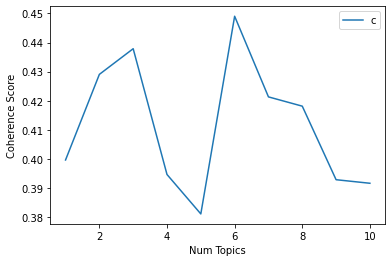

In [83]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [88]:
plt.savefig('/content/drive/MyDrive/Gemastik21/tes-plot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [84]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)), 
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

,num_of_topics,coherence_values
0,1,0.399632
1,2,0.429063
2,3,0.437889
3,4,0.394641
4,5,0.381086
5,6,0.449052
6,7,0.421325
7,8,0.418135
8,9,0.392846
9,10,0.391624


In [85]:
coherence_df.to_csv('/content/drive/MyDrive/Gemastik21/coherence-value-final.csv', index=False)

E. Base Model

In [86]:
# build LDA Model
model = LdaModel(corpus=corpus, num_topics=6, id2word=dictionary)

In [87]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.033*"bitcoin" + 0.017*"crypto" + 0.011*"eth" + 0.011*"btc" + 0.009*"uang" + 0.009*"cryptocurrency" + 0.008*"doge" + 0.008*"mei" + 0.007*"kripto" + 0.007*"trading"

Topic 2:
Word: 0.082*"crypto" + 0.028*"trading" + 0.018*"main" + 0.018*"saham" + 0.017*"beli" + 0.015*"bitcoin" + 0.014*"ajar" + 0.013*"orang" + 0.010*"pakai" + 0.008*"duit"

Topic 3:
Word: 0.033*"trading" + 0.029*"elon_musk" + 0.017*"elon" + 0.015*"saldo" + 0.011*"musk" + 0.010*"matic" + 0.009*"uang" + 0.009*"aset_gabung" + 0.008*"latoken_rumah" + 0.008*"rumah"

Topic 4:
Word: 0.043*"crypto" + 0.027*"bitcoin" + 0.012*"harga" + 0.010*"koin" + 0.009*"pakai" + 0.008*"wallet" + 0.008*"tko" + 0.008*"turun" + 0.007*"binance" + 0.007*"beli"

Topic 5:
Word: 0.036*"terima_kasih" + 0.033*"menang" + 0.033*"andbismillah" + 0.027*"wish_luck" + 0.022*"bismillah" + 0.021*"kasih" + 0.020*"anddone" + 0.016*"terima" + 0.014*"tg" + 0.011*"luck"

Topic 6:
Word: 0.019*"trading" + 0.014*"card" + 0.014*"crypto" + 0.010*"andtg" + 

In [96]:
from gensim.test.utils import datapath

temp_file = datapath("/content/drive/MyDrive/Gemastik21/cryptocurrency-ldamodel")
model.save(temp_file)

In [98]:
temp_file = datapath("/content/drive/MyDrive/Gemastik21/ldamodel.model")
mymodel = LdaModel.load(temp_file)
mymodel.show_topics(num_topics=6)

[(0,
  '0.033*"bitcoin" + 0.017*"crypto" + 0.011*"eth" + 0.011*"btc" + 0.009*"uang" + 0.009*"cryptocurrency" + 0.008*"doge" + 0.008*"mei" + 0.007*"kripto" + 0.007*"trading"'),
 (1,
  '0.082*"crypto" + 0.028*"trading" + 0.018*"main" + 0.018*"saham" + 0.017*"beli" + 0.015*"bitcoin" + 0.014*"ajar" + 0.013*"orang" + 0.010*"pakai" + 0.008*"duit"'),
 (2,
  '0.033*"trading" + 0.029*"elon_musk" + 0.017*"elon" + 0.015*"saldo" + 0.011*"musk" + 0.010*"matic" + 0.009*"uang" + 0.009*"aset_gabung" + 0.008*"latoken_rumah" + 0.008*"rumah"'),
 (3,
  '0.043*"crypto" + 0.027*"bitcoin" + 0.012*"harga" + 0.010*"koin" + 0.009*"pakai" + 0.008*"wallet" + 0.008*"tko" + 0.008*"turun" + 0.007*"binance" + 0.007*"beli"'),
 (4,
  '0.036*"terima_kasih" + 0.033*"menang" + 0.033*"andbismillah" + 0.027*"wish_luck" + 0.022*"bismillah" + 0.021*"kasih" + 0.020*"anddone" + 0.016*"terima" + 0.014*"tg" + 0.011*"luck"'),
 (5,
  '0.019*"trading" + 0.014*"card" + 0.014*"crypto" + 0.010*"andtg" + 0.006*"kar" + 0.006*"pc" + 0.005

# Extract dominant topic per tweet

In [100]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, 
                                                  corpus=corpus, 
                                                  texts=data_tokens)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

In [104]:
df_dominant_topic[:10:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4812,"trading, elon_musk, elon, saldo, musk, matic, ...","[hold, keras, anjing, sayang, dijualin]"
1,1,4.0,0.2680,"terima_kasih, menang, andbismillah, wish_luck,...","[ajak, generasi, milenial, khusus, indonesia, ..."
2,2,5.0,0.7155,"trading, card, crypto, andtg, kar, pc, album, ...","[rt, mncsekuritas, mnc, sekuritas, tingkat, fo..."
3,3,1.0,0.8609,"crypto, trading, main, saham, beli, bitcoin, a...","[kitadua, karyawan, enak, swing, trading]"
4,4,0.0,0.9690,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","[songoldfx, jasa, konsultasi, forex, trading, ..."
5,5,2.0,0.5455,"trading, elon_musk, elon, saldo, musk, matic, ...","[pandemi, dapur, ngebul, autopilot, trading, v..."
6,6,1.0,0.9603,"crypto, trading, main, saham, beli, bitcoin, a...","[tradeworks, strategi, trading, programming, i..."
7,7,1.0,0.6770,"crypto, trading, main, saham, beli, bitcoin, a...","[ayun, app, bagus, demo, trading]"
8,8,2.0,0.5140,"trading, elon_musk, elon, saldo, musk, matic, ...","[rpl, insider, trading, case, sebi, fines, ril..."
9,9,0.0,0.9402,"bitcoin, crypto, eth, btc, uang, cryptocurrenc...","[rp, investasi, trading, bitcoin, indonesia, r..."


In [105]:
# save the df_dominant_topic
df_dominant_topic.to_csv('/content/drive/MyDrive/Gemastik21/dominant_topic_resuls.csv', index=False)

# Create Slang Words Dictionary Bahasa Indonesia

In [ ]:
lexicon_file = '/content/drive/MyDrive/Gemastik21/colloquial-indonesian-lexicon.csv'
lexicon_df = pd.read_csv(lexicon_file, header=0)

In [ ]:
lexicon_df

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0
...,...,...,...,...,...,...,...
15001,gataunya,enggak taunya,0,Ini kaya nenek2 ya beb gataunya agnezz @yugime...,akronim,0,0
15002,gtau,enggak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,enggak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0


In [ ]:
lexicon_df = lexicon_df[['slang', 'formal']]
lexicon_df.head()

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
lex_dict = dict(lexicon_df.values)

In [ ]:
lex_dict

In [ ]:
lexicon_df.to_csv('/content/drive/MyDrive/Gemastik21/slang-words.csv', index=False)

# Notes
this function supposed to be compared slang words with formal words. but, not going to use it now.

```
def word_conversion(word, formal):
  fuzzed = fuzz_partial_ratio(word, formal)
  if fuzzed > 50:
    return formal

for i in english_cleaned:
  for word in english_cleaned[i]:
    formal_word = word_conversion(word, formal)
```



# Problem in Preprocessing text



```
df.clean_text[31420]
# 'fail'

df.iloc[31420]
# Output
Username                                       @GEMBIRA32127252
PostDate                                             2021-03-26
TweetText                       #STC #ETH #DEFI #PTO #ICOMantap
TweetURL      https://twitter.com/GEMBIRA32127252/status/137...
clean_text                                                 fail
Name: 31420, dtype: object
```

